Metodo del punto fijo

Vector inicial: 
Criterio de paro: 0.001
Converge
x= 0.0
x= 0.2824858757062147
x= 0.3326867791154473
x= 0.3514868867020392
x= 0.3592432744506785
x= 0.3625552111610426
x= 0.3639891763224981
x= 0.364613702029558
Error: 1
Error: 0.2824858757062147
Error: 0.05020090340923261
Error: 0.018800107586591897
Error: 0.007756387748639293
Error: 0.003311936710364116
Error: 0.0014339651614554971
Error: 0.0006245257070598975


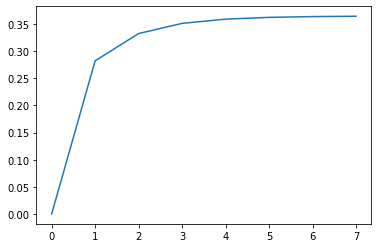

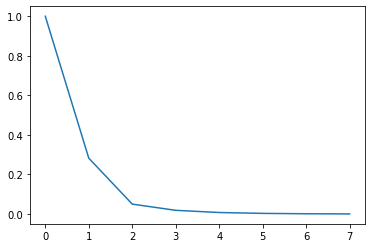

In [7]:
#   PuntoFijo
import matplotlib.pyplot as plt
error_reg = []
error_reg.append(1)
xn_reg = []

def gn(x):
    # 2 * pow(x,2) - 5    5/(2*x-1)   (x+5/2)**1/2

    #   (((1.7*(x**2)) - (17.7*x) + 5)/2)**1/3
    #   (((-2*(x**3)) - (17.7*x) + 5)/-11.7)**1/2
    #   ((-2*(x**3)) + (11.7*(x**2)) + 5) / 17.7

    return ((-2*(x**3)) + (11.7*(x**2)) + 5) / 17.7

#   error = |Xn - Xn-1| si el error es constante o se vuelve cero significa que converge, de lo contrario diverge y si es este el caso no se puede aplicar el metodo
def convergencia():
    vec_in = input("Vector inicial: ")
    parada = input("Criterio de paro: ")
    contador = 0

    if(vec_in == ""):
        vec_in = 0.0000
        xn_reg.append(float(vec_in))
    else:
        xn_reg.append(float(vec_in))

    if(parada == ""):
        parada = 0.0001

    while(contador <= 1000):
        if(float(error_reg[contador]) <= float(parada)):
            return contador
        xn_reg.append(gn(float(xn_reg[contador])))
        error_reg.append(abs(xn_reg[contador+1] - xn_reg[contador]))
        contador += 1
    return contador

def mostrar(contador):
    if(contador < 500):
        print("Converge")
    else:
        print("No converge")

    for registro in xn_reg:
        print("x=", registro)
    for registro in error_reg:
        print("Error:", registro)
    plt.plot(xn_reg, label = "raiz")
    plt.show()
    plt.plot(error_reg, label = "error")
    plt.show()

mostrar(convergencia())


Metodo de falsa posicion

Intervalo
0
0.5
Criterio de paro: 0.001
xl:  0.0  -> f(xl):  -5.0 
xr:  0.40485829959514175  -> f(xr):  0.3809629069793443 
xu:  0.5  -> f(xu):  1.1749999999999998
Nuevo intervalo:  0.0   0.40485829959514175
xl:  0.0  -> f(xl):  -5.0 
xr:  0.37619502921124287  -> f(xr):  0.10931669952455003 
xu:  0.40485829959514175  -> f(xu):  0.3809629069793443
Nuevo intervalo:  0.0   0.37619502921124287
xl:  0.0  -> f(xl):  -5.0 
xr:  0.3681461253382961  -> f(xr):  0.030257898568809338 
xu:  0.37619502921124287  -> f(xu):  0.10931669952455003
Nuevo intervalo:  0.0   0.3681461253382961
xl:  0.0  -> f(xl):  -5.0 
xr:  0.36593166072363775  -> f(xr):  0.00829130058347971 
xu:  0.3681461253382961  -> f(xu):  0.030257898568809338
Nuevo intervalo:  0.0   0.36593166072363775
xl:  0.0  -> f(xl):  -5.0 
xr:  0.3653258554279837  -> f(xr):  0.002265722681924487 
xu:  0.36593166072363775  -> f(xu):  0.00829130058347971
Nuevo intervalo:  0.0   0.3653258554279837
xl:  0.0  -> f(xl):  -5.0 
xr:  0.36516038499461917

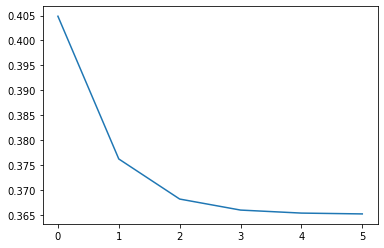

In [2]:
#   libreria para graficar -> variable plt
import matplotlib.pyplot as plt
import math
from math import log
from math import e

def solicitar():
    lista = []
    print("Intervalo")
    for i in range(2):
        lista.append((input()))
    return lista

def solucion(x):
    # fx = math.cos(e**x - 2)
    fx = (2*(x**3)) - (11.7*(x**2)) + (17.7*x) - 5
    return fx

def comprobar(xl, xu):
    if (solucion(xl) * solucion(xu) <= 0):
        return True
    return False

def nuevointervalo(fxl, fxr, fxu):
    if (fxl * fxr < 0):
        nxl = xl
        nxu = xr
        print("Nuevo intervalo: ", nxl," " ,nxu)
    elif(fxr * fxu < 0):
        nxl = xr
        nxu = xu
        print("Nuevo intervalo: ", nxl," " ,nxu)
    return nxl, nxu

def mitad(xl, xu, fxl, fxu):
    m = xu - (fxu * (xl - xu) / (fxl - fxu))
    #   guardamos m en registroxr para despues graficar
    registroxr.append(m)
    return m

#   registro de todos los xr calculados
registroxr = []
#   Ea (Error aceptado) -> valor a calcular y a comparar con el criterio de paro
Ea = 1
#   primer intervalo
intervalo = solicitar()
xl = float(intervalo[0])
xu = float(intervalo[1])
#   criterio de paro
Cp = abs(float(input("Criterio de paro: ")))
#   True -> el procedimiento funciona
if (comprobar(xl, xu)):
    while (Ea > Cp):
        #   resultado de sustituir los valores del intervalo en la funcion
        fxl = solucion(xl)
        fxu = solucion(xu)
        #   mitad del intervalo
        xr = mitad(xl, xu, fxl, fxu)
        fxr = solucion(xr)
        print("xl: ", xl, " -> f(xl): ", fxl,"\nxr: ", xr, " -> f(xr): ", fxr, "\nxu: ", xu, " -> f(xu): ", fxu)
        #   calculamos nuestro error aproximado
        if (len(registroxr) > 1):
            #   Error aceptado -> Ea = |xr (nuevo) - xr (anterior) / xr (nuevo)|
            Ea = abs(float((registroxr[-1] - registroxr[-2]) / registroxr[-1]))
        #   nuevo intervalo
        xl, xu = nuevointervalo(fxl, fxr, fxu)

    #   criterio de paro vs error aceptado
    print("xr =", registroxr[-1],"\nCriterio de paro: ", Cp, "\nError aceptado: ", Ea)
    #   mostramos grafico con todos los xr almacenados en el proceso
    plt.plot(registroxr)
    plt.show()
#   False -> el procedimiento no funciona
else:
    print("Este intervalo no es valido\nxl: ", xl, "\nxu: ", xu,)


Newton Raphson

X: 3
Criterio de paro: 0.001
x= 3.0
x= 5.13333333333332
x= 4.26975005653324
x= 3.7929344806432264
x= 3.5998192883980815
x= 3.56433803284734
x= 3.5631621003251914
x= 3.5631608248635556
Error: 1
Error: 2.1333333333333204
Error: 0.8635832768000808
Error: 0.4768155758900132
Error: 0.19311519224514484
Error: 0.03548125555074133
Error: 0.0011759325221487593
Error: 1.2754616358634507e-06


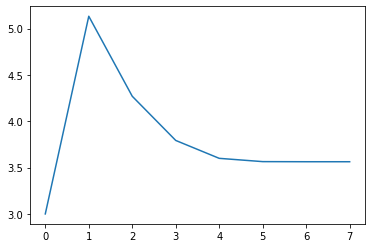

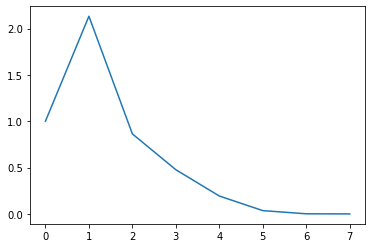

In [4]:
#   NewtonRaphson
import matplotlib.pyplot as plt
from math import e
import numpy

#x = float(input("X: "))

xn_reg = []
error_reg = []
error_reg.append(1)

def gn(x):
    #   e**(-x) - x     5/(2*x-1)   ((x+5)/2)**(1/2)   (x**x) - 100
    fx = (2*(x**3)) - (11.7*(x**2)) + (17.7*x) - 5
    #   -e**(-x) - 1    -(10/(2*x-1)**2)    (1/((2**(3/2))*((x+5)**(1/2))))    x**x * (1 + numpy.log(x))
    dfx = (6*(x**2)) - (23.4*x) + 17.7
    #('{0:4f}'.format(x - (fx/dfx)))
    #print ("f(x): ", fx, "\nf'(x): ", dfx)
    return x - (fx/dfx)

#xn = gn(x)
#print(xn)
#print(float('{0:4f}'.format(gn(x))))

def calcula():
    x = input("X: ")
    parada = input("Criterio de paro: ")

    if(x == ""):
        x = 0.0
        xn_reg.append(float(x))
    else:
        xn_reg.append(float(x))

    if(parada == ""):
        parada = 0.0001

    contador = 0
    while(contador <= 500):
        if(float(error_reg[contador]) <= float(parada)):
            break
        xn_reg.append(gn(xn_reg[contador]))
        error_reg.append(abs(xn_reg[contador+1] - xn_reg[contador]))
        contador += 1
    muestra()

def muestra():
    for registro in xn_reg:
        print("x=", registro)

    for registro in error_reg:
        print("Error:", registro)

    plt.plot(xn_reg, label = "raiz")
    plt.show()

    plt.plot(error_reg, label = "error")
    plt.show()

calcula()


Metodo de la secante

Xi-1: 3
Xi: 4
Criterio de paro: 0.001
x= 3.0
x= 4.0
x= 3.326530612244898
x= 3.4812727094176554
x= 3.586275384711736
x= 3.56134020948947
x= 3.5631226111278784
x= 3.5631608890875883
x= 3.563160824859791
Error: 1
Error: 1.0
Error: 0.6734693877551021
Error: 0.15474209717275755
Error: 0.10500267529408047
Error: 0.024935175222265737
Error: 0.0017824016384082597
Error: 3.827795970989811e-05


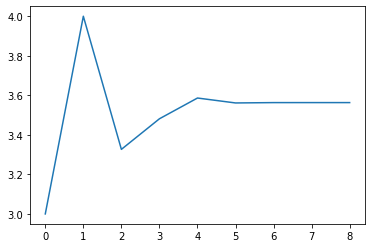

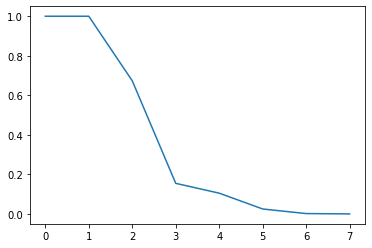

In [5]:
#   Metodo de la Secante
import matplotlib.pyplot as plt
from math import e
import numpy

xn_reg = []
error_reg = []
error_reg.append(1)

def f(x):
    #   e**(-x) - x
    return (2*(x**3)) - (11.7*(x**2)) + (17.7*x) - 5

def solucion(xh, xi):   # xi-1, xi
    #print("xi-1", xh, " -> f(xi-1): ", f(xh), "\nxi: ", xi, " -> f(xi): ", f(xi))
    return xi - (f(xi)  * (xh - xi)/ (f(xh) - f(xi)))

def calcula():
    xh = input("Xi-1: ")    #xi-1 = 0
    xi = input("Xi: ")      #xi = 1
    xn_reg.append(float(xh))
    xn_reg.append(float(xi))
    contador = 0

    parada = input("Criterio de paro: ")

    if(parada == ""):
        parada = 0.0001

    while(contador <= 500):
        if(float(error_reg[contador]) <= float(parada)):
            break
        xn_reg.append(solucion(xn_reg[-2], xn_reg[-1]))
        error_reg.append(abs(xn_reg[contador+1] - xn_reg[contador]))
        '''
        print("xi-1 =", xn_reg[-2],"  ->  f(xi-1) =", f(xn_reg[-2]), "\nxi =",xn_reg[-1] , "  ->  f(xi) =", f(xn_reg[-1]), "\nSolucion =", solucion(xn_reg[-2], xn_reg[-1]))
        '''
        contador += 1

    muestra()

def muestra():

    for registro in xn_reg:
        print("x=", registro)

    for registro in error_reg:
        print("Error:", registro)

    plt.plot(xn_reg, label = "raiz")
    plt.show()

    plt.plot(error_reg, label = "error")
    plt.show()

calcula()
